### Problem Statement: Predicting Beats per Minutes in a song.
Algorithm used: Linear Regression. L1 and L2, SVR , KNN Regresor, Random Forest , Feed-Forward Neural Network, CNN , Gradient Boosting and Stacking

## Importing Libraries and Datasets

In [106]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score ,mean_squared_error,mean_absolute_error
from scipy import stats

In [4]:
#Loading datasets
train_data = pd.read_csv("datasets/train.csv")
test_data = pd.read_csv("datasets/test.csv")

In [5]:
train_data = train_data.drop(columns = ['id'])
test_data = test_data.drop(columns = ['id'])

## Train Data Preprocessing

In [109]:
#Checking info of train data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   RhythmScore                524164 non-null  float64
 1   VocalContent               524164 non-null  float64
 2   AcousticQuality            524164 non-null  float64
 3   InstrumentalScore          524164 non-null  float64
 4   LivePerformanceLikelihood  524164 non-null  float64
 5   MoodScore                  524164 non-null  float64
 6   TrackDurationMs            524164 non-null  float64
 7   Energy                     524164 non-null  float64
 8   BeatsPerMinute             524164 non-null  float64
dtypes: float64(9)
memory usage: 36.0 MB


In [7]:
#checking null entries
train_data.isna().sum()

RhythmScore                  0
AudioLoudness                0
VocalContent                 0
AcousticQuality              0
InstrumentalScore            0
LivePerformanceLikelihood    0
MoodScore                    0
TrackDurationMs              0
Energy                       0
BeatsPerMinute               0
dtype: int64

In [162]:
train_data.describe()

,RhythmScore,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
count,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000
mean,0.632843,0.251781,0.404914,0.247746,0.374833,0.555843,241903.692949,0.500923,119.034899
std,0.156899,0.085742,0.233815,0.208249,0.136771,0.225480,59326.601501,0.289952,26.468077
min,0.076900,0.152408,0.002315,0.001034,0.154950,0.025600,63973.000000,0.000067,46.718000
25%,0.515850,0.152408,0.259056,0.001034,0.273442,0.403921,207099.876625,0.254933,101.070410
50%,0.634686,0.253597,0.465969,0.267620,0.392249,0.564817,243684.058150,0.511800,118.747660
75%,0.739179,0.319317,0.578183,0.430934,0.488044,0.716633,281851.658500,0.746000,136.686590
max,0.975000,0.477757,0.831050,0.790912,0.685533,0.978000,464723.228100,1.000000,206.037000


In [170]:
train_data.head()

,RhythmScore,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0.603610,0.152408,0.002315,0.001034,0.223850,0.409866,290715.6450,0.826267,147.53020
1,0.639451,0.262826,0.606680,0.547422,0.396800,0.651010,164519.5174,0.145400,136.15963
2,0.514538,0.324042,0.400200,0.611711,0.170724,0.423865,174495.5667,0.624667,55.31989
3,0.734463,0.227178,0.040614,0.384937,0.287816,0.278745,225567.4651,0.487467,147.91212
4,0.532968,0.152408,0.257742,0.001034,0.534967,0.477769,213960.6789,0.947333,89.58511


In [171]:
#Checking Maximum and Minimum of the y variable
max_beats = train_data["BeatsPerMinute"].max()
min_beats = train_data["BeatsPerMinute"].min()

print(f"Max Beats: {max_beats} \n" f"Min Beats: {min_beats}")

Max Beats: 206.037 
Min Beats: 46.718


In [172]:
#cxheaking column names
train_data.columns

Index(['RhythmScore', 'VocalContent', 'AcousticQuality', 'InstrumentalScore',
       'LivePerformanceLikelihood', 'MoodScore', 'TrackDurationMs', 'Energy',
       'BeatsPerMinute'],
      dtype='object')

In [173]:
#Max and Min values of the each column
columns = train_data.columns
train_data_max_value = train_data[columns].max()
train_data_min_value = train_data[columns].min()
print(f"Max Values: \n{train_data_max_value}\n",f"\nMin Value \n{train_data_min_value}")

Max Values: 
RhythmScore                       0.975000
VocalContent                      0.477757
AcousticQuality                   0.831050
InstrumentalScore                 0.790912
LivePerformanceLikelihood         0.685533
MoodScore                         0.978000
TrackDurationMs              464723.228100
Energy                            1.000000
BeatsPerMinute                  206.037000
dtype: float64
 
Min Value 
RhythmScore                      0.076900
VocalContent                     0.152408
AcousticQuality                  0.002315
InstrumentalScore                0.001034
LivePerformanceLikelihood        0.154950
MoodScore                        0.025600
TrackDurationMs              63973.000000
Energy                           0.000067
BeatsPerMinute                  46.718000
dtype: float64


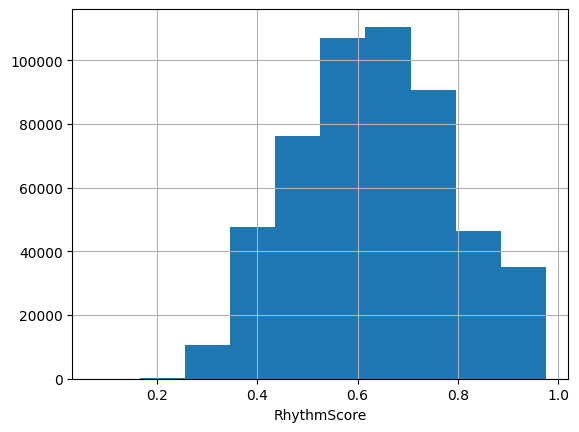

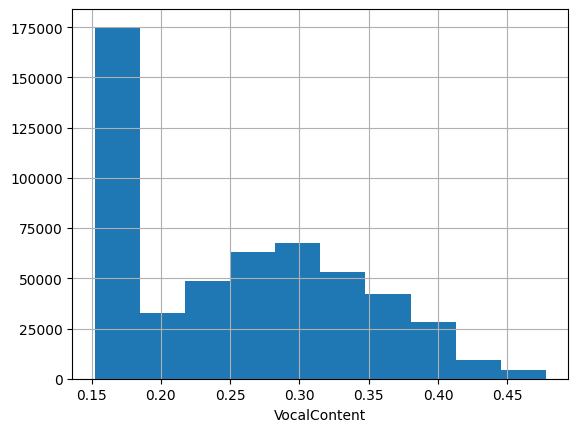

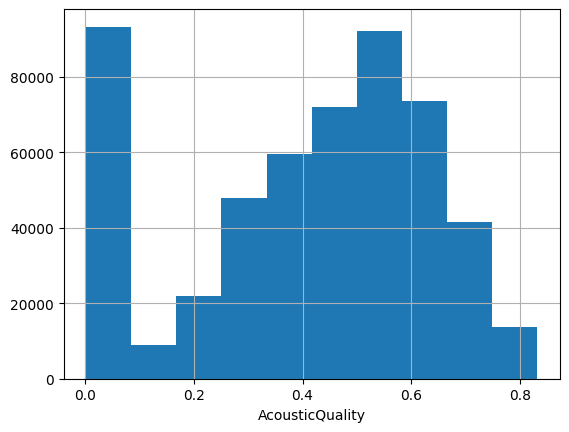

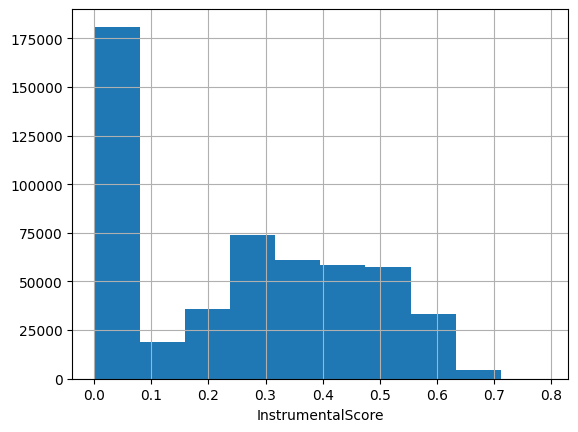

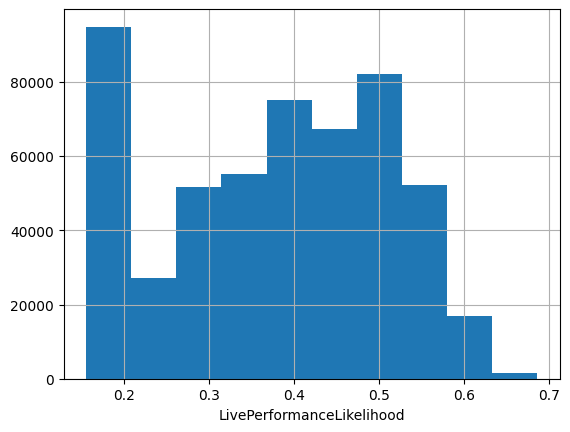

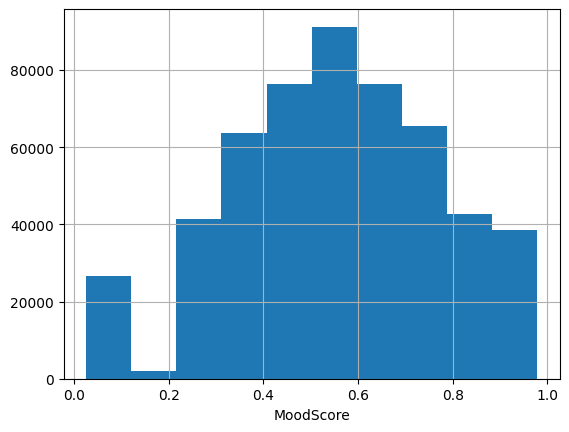

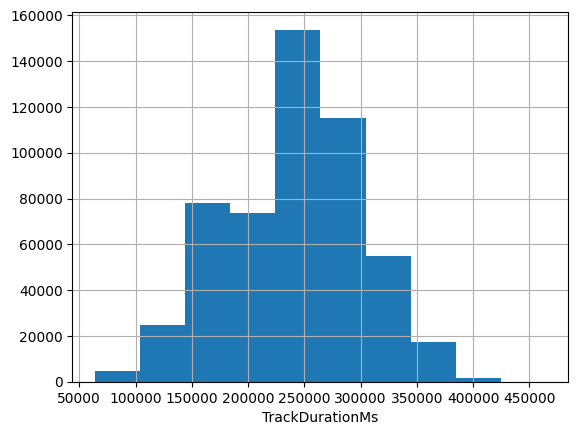

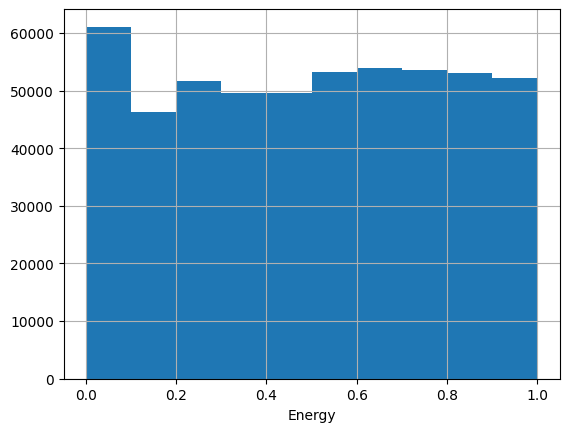

In [175]:
#checking data distribution
for columns in data_no_outliers:
    plt.figure()
    train_data[columns].hist()
    plt.xlabel(columns)
plt.show()

In [149]:
left_skewed_features = train_data[['VocalContent', 'AcousticQuality', 'InstrumentalScore','LivePerformanceLikelihood']]
reflected_data = train_data.copy()

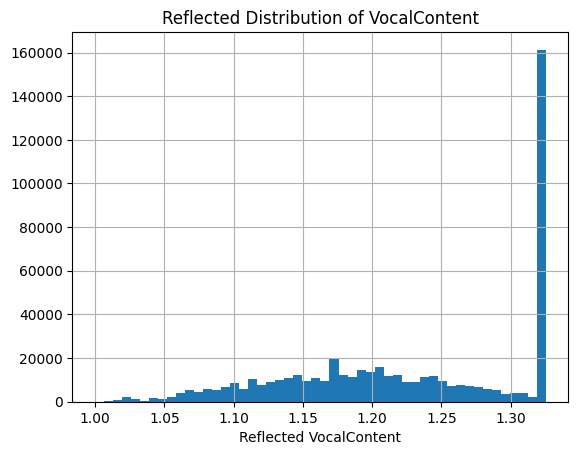

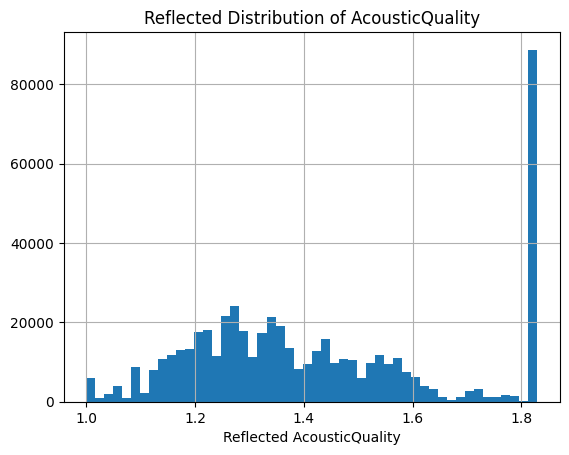

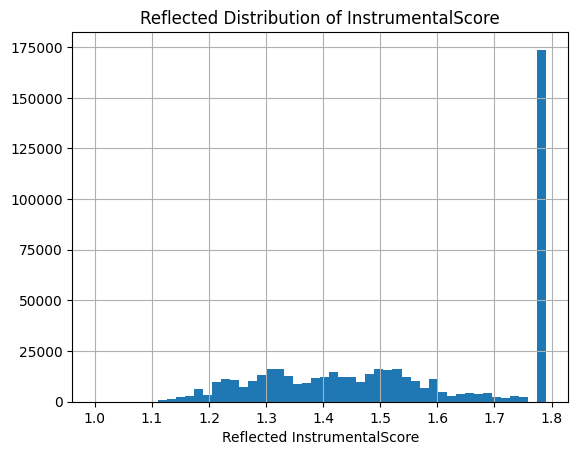

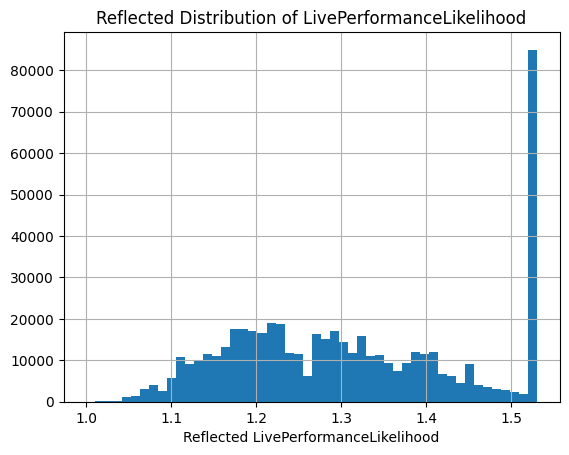

In [152]:
for col in left_skewed_features:
    max_val = reflected_data[col].max()
    reflected_data[col] = (max_val + 1) - reflected_data[col]
    plt.figure()
    reflected_data[col].hist(bins=50)
    plt.title(f"Reflected Distribution of {col}")
    plt.xlabel(f"Reflected {col}")
    plt.show()

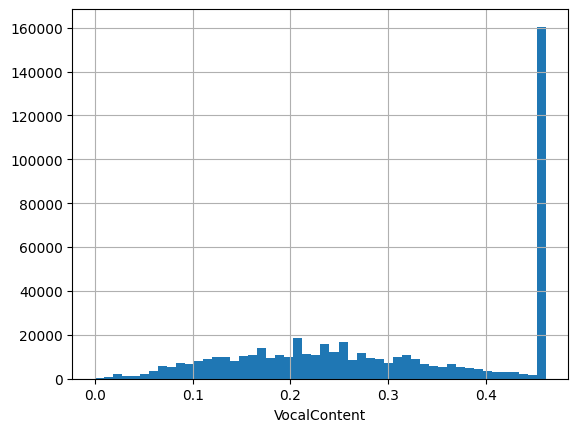

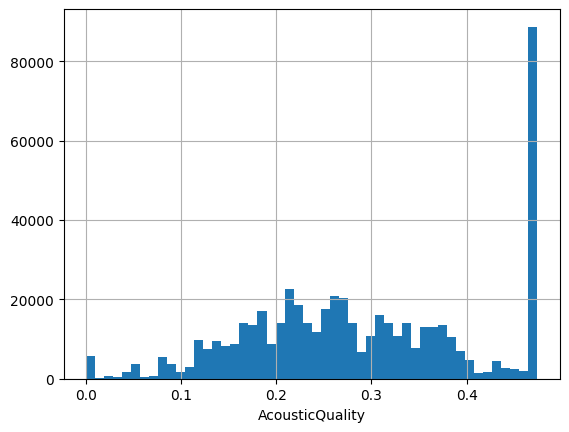

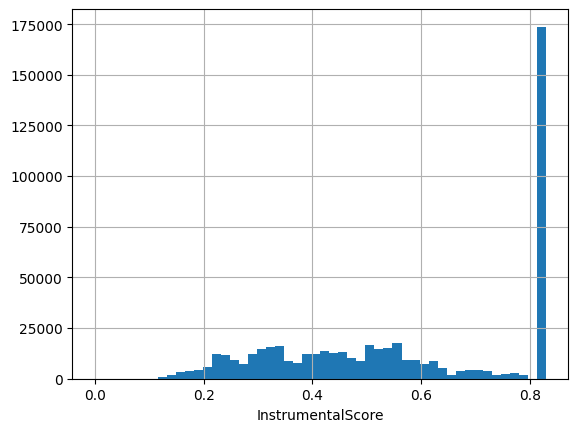

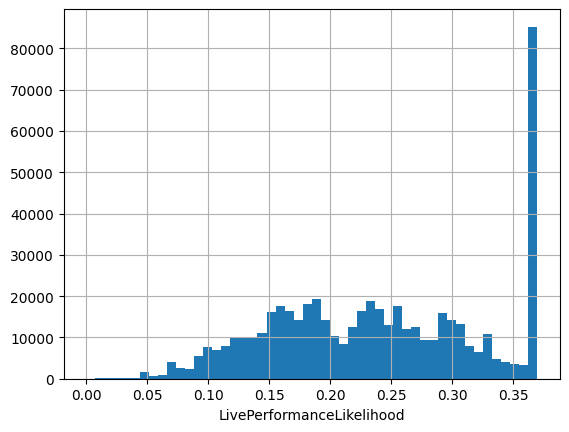

In [184]:
for cols in left_skewed_features:
    transformed_data, lambda_opt = stats.boxcox(reflected_data[cols])
    transformed_data_series = pd.Series(transformed_data)
    plt.figure()
    transformed_data_series.hist(bins=50)
    plt.xlabel(cols)
    plt.show()

In [ ]:
#Max and Min values of the each column
columns = train_data.columns
train_data_max_value = train_data[columns].max()
train_data_min_value = train_data[columns].min()
print(f"Max Values: \n{train_data_max_value}\n",f"\nMin Value \n{train_data_min_value}")

In [14]:
train_data  = train_data.drop(columns = ["AudioLoudness"])

In [15]:
#Splitting dataset X and y
X_train = train_data.iloc[:,:-1]
y_train = train_data.iloc[:,:1]
print(X_train.shape,y_train.shape)

(524164, 8) (524164, 1)


In [16]:
#Splitying training dataset into training and validation dataset
X_train,x_val,y_train,y_val = train_test_split(X_train,y_train, test_size = 0.2, random_state =42) 
X_train.shape,x_val.shape,y_train.shape,y_val.shape

((419331, 8), (104833, 8), (419331, 1), (104833, 1))

In [17]:
#Standard Scaler
st = StandardScaler()
st

StandardScaler()

In [285]:
scaled_X_train = st.fit_transform(X_train)
scaled_x_val = st.fit_transform(x_val)

In [79]:
scaled_X_train = st.fit_transform(X_train)
scaled_x_val = st.fit_transform(x_val)
scaled_X_train.shape,scaled_x_val.shape

((419331, 8), (104833, 8))

## Test Data Processing

In [18]:
#Checking test data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174722 entries, 0 to 174721
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   RhythmScore                174722 non-null  float64
 1   AudioLoudness              174722 non-null  float64
 2   VocalContent               174722 non-null  float64
 3   AcousticQuality            174722 non-null  float64
 4   InstrumentalScore          174722 non-null  float64
 5   LivePerformanceLikelihood  174722 non-null  float64
 6   MoodScore                  174722 non-null  float64
 7   TrackDurationMs            174722 non-null  float64
 8   Energy                     174722 non-null  float64
dtypes: float64(9)
memory usage: 12.0 MB


In [19]:
#checking test data null entries
test_data.isna().sum()

RhythmScore                  0
AudioLoudness                0
VocalContent                 0
AcousticQuality              0
InstrumentalScore            0
LivePerformanceLikelihood    0
MoodScore                    0
TrackDurationMs              0
Energy                       0
dtype: int64

In [20]:
test_data.head()

,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy
0,0.410013,-16.794967,0.023500,0.232910,0.012689,0.271585,0.664321,302901.5498,0.424867
1,0.463071,-1.357000,0.141818,0.057725,0.257942,0.097624,0.829552,221995.6643,0.846000
2,0.686569,-3.368928,0.167851,0.287823,0.210915,0.325909,0.304978,357724.0127,0.134067
3,0.885793,-5.598049,0.118488,0.000005,0.376906,0.134435,0.487740,271790.3989,0.316467
4,0.637391,-7.068160,0.126099,0.539073,0.068950,0.024300,0.591248,277728.5383,0.481067


In [21]:
#Checking Maximum and Minimum of the y variable
cols = test_data.columns
max_beats = test_data[cols].max()
min_beats = test_data[cols].min()

print(f"Max Beats:\n{max_beats} \n" f"\nMin Beats: \n{min_beats}")

Max Beats:
RhythmScore                       0.975000
AudioLoudness                    -1.357000
VocalContent                      0.258857
AcousticQuality                   0.995000
InstrumentalScore                 0.680914
LivePerformanceLikelihood         0.599544
MoodScore                         0.978000
TrackDurationMs              449288.808400
Energy                            0.999867
dtype: float64 

Min Beats: 
RhythmScore                      0.140859
AudioLoudness                  -27.442731
VocalContent                     0.023500
AcousticQuality                  0.000005
InstrumentalScore                0.000001
LivePerformanceLikelihood        0.024300
MoodScore                        0.025600
TrackDurationMs              63973.000000
Energy                           0.000067
dtype: float64


In [50]:
test_data = test_data.drop(columns = ["AudioLoudness"])

## Multi Linear Regression Model

In [71]:
#Linear Regression model on train data
lr = LinearRegression()
lr.fit(scaled_X_train,y_train)

LinearRegression()

In [72]:
predict = lr.predict(scaled_x_val)
y_val.shape

(104833, 1)

In [73]:
print(r2_score(y_val,predict),mean_absolute_error(y_val,predict), mean_squared_error(y_val,predict))

0.9999960377999586 0.0002549031336519415 9.785002527446483e-08


In [74]:
lr.coef_

array([[ 1.56836431e-01, -9.26347679e-17,  3.60499684e-16,
        -8.17469749e-17, -1.84351087e-16, -3.54189252e-16,
         1.45100029e-16, -3.61041954e-17]])

In [76]:
final_predict = lr.predict(y_test)

In [78]:
final_predict.flatten()

array([0.41081985, 0.46374517, 0.68668575, ..., 0.56974304, 0.76451683,
       0.82296766])

## Ridge Regression Model

## Lasso Regression Model

## KNN Regression Model

## Suport Vector Regressor(SVR) Model

## Random Forest Regressor Model

## XGBoost Regressor Model

## Feed-Forward Neural Network Model

## Convolutional Neural Network Model 